In [2]:
import csv
import re
from collatex import *

#create the dictionary (here: Dictionary.csv consisting in two columns, separated by a comma. The first Column 'Original' are the strings as found in the text, the second column 'Normalised' contains the strings you want to replace them with. No whitespaces behind the strings.) 
Normit = {}
with open('dictionary.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['Original', 'Normalised'],  dialect='excel')
    for row in reader:
        Normit[row['Original']]= row['Normalised']

#read in the witnesses  from your file system 
from collatex.core_classes import WordPunctuationTokenizer
tokenizer = WordPunctuationTokenizer()
testimone_P4 = open( "lettere/T196-part1-clean-P4.txt", encoding='utf-8' ).read()
testimone_S2 = open( "lettere/T196-part1-clean-S2.txt", encoding='utf-8' ).read()
testimone_S4 = open( "lettere/T196-part1-clean-S4.txt", encoding='utf-8' ).read()

# build a function to tokenize and to normalize by replace keys to be found in the dictionary by the corresponding values 
def tokennormalizer(witness) :
    tokens_as_strings = tokenizer.tokenize(witness)
    list = []
    for token_string in tokens_as_strings:
        normversion = re.sub(r'\s+$',"", token_string)
        replaceversion = Normit.get(normversion,normversion)
        list.append({'t':token_string, 'n':replaceversion})
    return(list)

#collate
tokens_a = tokennormalizer(testimone_P4) 
tokens_b = tokennormalizer(testimone_S2) 
tokens_c = tokennormalizer(testimone_S4) 


witness_a = { "id": "P4", "tokens": tokens_a }
witness_b = { "id": "S2", "tokens": tokens_b }
witness_c = { "id": "S4", "tokens": tokens_c }


input = { "witnesses": [ witness_a, witness_b, witness_c ] }

table = collate(input, output='html2', segmentation=True)

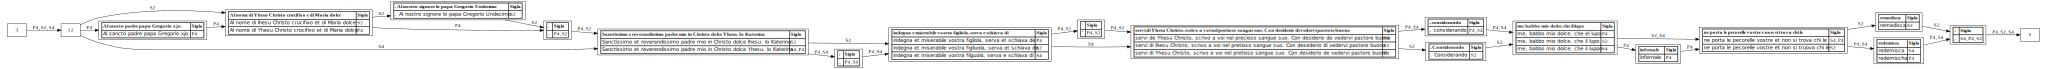

None


In [3]:

graph = collate(input, output='svg', segmentation=True)
print(graph)

In [4]:

graph = collate(input, output='svg', segmentation=False)
print(graph)

None
